# Pyber Data


### Based on review of the data below, the following trends are observable:

The number of rides and the number of drivers have a direct relationship - as one increases, so does the other, and they both have an inverse relationship to ride fare, which decreases as the number of rides and drivers increase.

Urban cities have a significantly higher number of drivers and rides than suburban and rural areas

Rural fares are signifintly higher than Urban fares: although Rural fares only account for 5.3% of the total number of rides for all cities, they account for 6.8% of the total fares for all cities.

In [94]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_data = pd.merge(city_data,ride_data,on="city",how="inner")

# Display the data table for preview
pyber_data.head(3)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416


## Bubble Plot of Ride Sharing Data

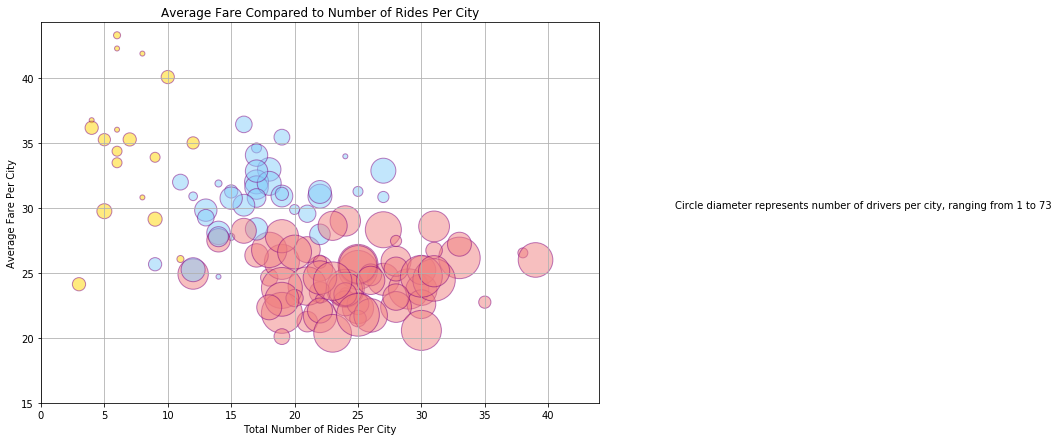

In [95]:
# Group by city and create aggregate dataframe with data for each city including Average Fare ($) Per City,
# Average Fare ($) Per City, Total Number of Drivers Per City, City Type (Urban, Suburban, Rural)
city_ride_df = pyber_data.groupby(["city"]).agg({"fare":["mean","count","sum"],"driver_count":"max","type":"min"})

city_ride_df.columns = city_ride_df.columns.droplevel(0)

city_ride_df = city_ride_df.rename(columns={"sum":"Total Fares Per City","mean":"Average Fare Per City","count":"Total Number of Rides Per City",
                                            "max":"Total Number of Drivers Per City","min":"City Type"})

# Color - City Type (Urban, Suburban, Rural)
type_colors = {"Rural":"gold","Suburban":"lightskyblue","Urban":"lightcoral"}

# Build the scatter plots for each city type
# X axis - Total Number of Rides Per City
# Y axis - Average Fare ($) Per City
# Mark size - Total Number of Drivers Per City
city_ride_df.plot(kind="scatter", x="Total Number of Rides Per City", y="Average Fare Per City",
                  s=(25*city_ride_df["Total Number of Drivers Per City"]), 
                  color=city_ride_df["City Type"].apply(lambda x:type_colors[x]),alpha=.5,
                  edgecolor="purple",grid=True, figsize=(10,7))
plt.xlim(0,city_ride_df["Total Number of Rides Per City"].max()+5)
plt.ylim(15,city_ride_df["Average Fare Per City"].max()+1)
# Create a legend
plt.title("Average Fare Compared to Number of Rides Per City")
# Incorporate a text label regarding circle size
# font = {'family': 'arial', 'color':  'black', 'weight': 'normal','size': 12}
# plt.text(43, 33, r'Note: Circle size correlates with driver count per city.', fontdict=font)
plt.text(50,30, text='Circle diameter represents number of drivers per city, ranging from '+str(city_ride_df["Total Number of Drivers Per City"].min())+
         " to "+str(city_ride_df["Total Number of Drivers Per City"].max()),s=0)

# Save Figure
plt.savefig("Riders_By_City_Scatter.png")
# Show Figure
plt.show()

## Total Fares by City Type

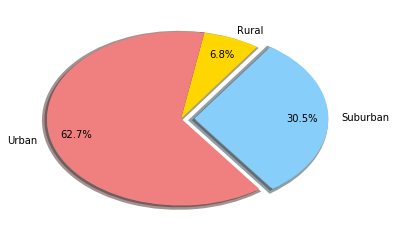

In [96]:
# Group by type and create dataframe with grouped data, use for values/sizes of pie sections
fare_data = city_ride_df.groupby("City Type")["Total Fares Per City"].sum()
# Labels for each section of the pie chart
type_labels = type_colors.keys()
# Colors for each section of the pie chart
pie_colors = type_colors.values()
# Create the pie chart
plt.pie(fare_data, colors=pie_colors, labels=type_labels, autopct='%1.1f%%',counterclock=False,explode=(0,.1,0),pctdistance=.8,
        shadow=True,startangle=80,wedgeprops = {'linewidth': 5})
# Save Figure 
plt.savefig("Total_Fares_by_City_Type.png")
# Show Figure
plt.show()

## Total Rides by City Type

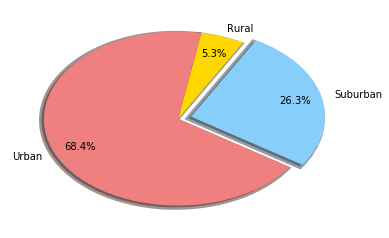

In [97]:
# Calculate Ride Percents
ride_nums = city_ride_df.groupby("City Type")["Total Number of Rides Per City"].sum()
ride_nums
# Build Pie Chart
plt.pie(ride_nums,labels=type_labels,colors=pie_colors,autopct='%1.1f%%',counterclock=False,
        explode=(0,.1,0),pctdistance=.8,shadow=True,startangle=80,wedgeprops={'linewidth':5})
# Save Figure
plt.savefig("Total_Rides_by_City_Type.png")
# Show Figure
plt.show()

## Total Drivers by City Type

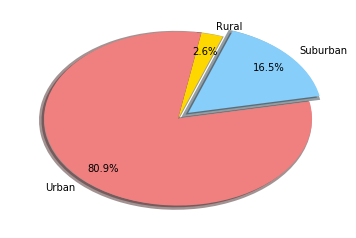

In [98]:
# Create Series grouped by city type, of count of drivers per city type 
tot_drivers = city_ride_df.groupby("City Type")["Total Number of Drivers Per City"].sum()
# Build Pie Charts
plt.pie(tot_drivers,colors=pie_colors,labels=type_labels,autopct='%1.1f%%',counterclock=False,
        explode=(0,.1,0),pctdistance=.8,shadow=True,startangle=80,wedgeprops={'linewidth':5})
# Save Figure
plt.savefig("Total_Drivers_By_City_Type.png")
# Show figure
plt.show()